# Symptom Diesease Analysis

## 1. Importing Libraries and Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

## 2. I couldn't find the data set I uploaded so I wanted to check the OS to see where the systems was looking for the data set, and figured out it was looking in the specific folder that I made for this project. So I had to move the data set into the folder in order to read it

In [4]:
import os
os.getcwd()

'C:\\Users\\hamre\\Portfolio Project 5.26'

## 3. Creating the data frame "df" where pandas is reading the data file 'disease.csv'

In [6]:
df = pd.read_csv('disease.csv')

## 4. Before analyzing the data, I'm checking to see how many missing (null) values there are in each column.

In [7]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

## 5. Checking to see how many unique values there were for the first column 'Symptom 1'.

In [9]:
df['Symptom_1'].nunique()

34

## 6. This block of code loops through each column in the dataset and collects unique, non-null values. It prints out how many unique values exist in each column and displays a preview (first 10) of those values. This helps identify categorical variables, spot typos, and understand the variety of data entries before cleaning or analysis.

In [12]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].dropna().unique()
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Number of unique values: {len(values)}")
    print(f"Unique values: {values[:10]}")
    print("-"*50)

Column: Disease
Number of unique values: 41
Unique values: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma']
--------------------------------------------------
Column: Symptom_1
Number of unique values: 34
Unique values: ['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat']
--------------------------------------------------
Column: Symptom_2
Number of unique values: 48
Unique values: [' skin_rash' ' nodal_skin_eruptions' ' shivering' ' chills' ' acidity'
 ' ulcers_on_tongue' ' vomiting' ' yellowish_skin' ' stomach_pain'
 ' loss_of_appetite']
--------------------------------------------------
Column: Symptom_3
Number of unique values: 54
Unique values: [' nodal_skin_eruptions' ' dischromic _patches' ' chills'
 ' watering_from_eyes' ' ulcers_on_tongue' ' vomiting' ' yellowish_skin'
 

## 7. This next block uses the counter function from collections in order to show the frequency in unique values of each sypmtom for the sypmtoms that appear the most out of all the diseases.

In [14]:
from collections import Counter
from IPython.display import display

symptom_cols = [col for col in df.columns if 'Symptom' in col]
all_symptoms = []
for col in symptom_cols:
    all_symptoms.extend(df[col].dropna().unique())
symptom_counts = Counter(all_symptoms)
symptom_summary = pd.DataFrame(symptom_counts.items(), columns=['Symptom', 'Frequency'])
symptom_summary = symptom_summary.sort_values(by='Frequency', ascending=False)
display(symptom_summary)


,Symptom,Frequency
15,chest_pain,10
36,loss_of_appetite,8
43,abdominal_pain,8
95,malaise,8
100,muscle_pain,8
...,...,...
126,stomach_bleeding,2
130,loss_of_smell,2
0,itching,1
2,continuous_sneezing,1


## 8. This next block I wanted to see the frequency of the most promienet symptoms for each diesase that have the highest frequency. So I defined my disease and sypmtoms columns, looped through each disease, counted the sypmtoms after gathering all sypmtoms. I stored the top 5 most common and converted the results into a dataframe. I also used the max function so I could see all of the diseases instead of only 10. 

In [30]:
from collections import Counter
import pandas as pd
from IPython.display import display

disease_col = 'Disease'
symptom_cols = [col for col in df.columns if 'Symptom' in col]
disease_symptom_freq = {}

for disease in df[disease_col].unique():
    subset = df[df[disease_col] == disease]
    symptoms = []
    
    for col in symptom_cols:
        symptoms.extend(subset[col].dropna().values)
    
    symptom_count = Counter(symptoms)
    
    disease_symptom_freq[disease] = symptom_count.most_common(5)

result = []

for disease, symptoms in disease_symptom_freq.items():
    for symptom, freq in symptoms:
        result.append({'Disease': disease, 'Symptom': symptom, 'Frequency': freq})

top_symptoms_df = pd.DataFrame(result)

from IPython.display import HTML

def render_scrollable_df(df, max_height=300):
    return HTML(f"""
    <div style="max-height:{max_height}px; overflow:auto; border:1px solid #ccc">
        {df.to_html(index=False)}
    </div>
    """)

render_scrollable_df(top_symptoms_df)


Disease,Symptom,Frequency
Fungal infection,itching,108
Fungal infection,skin_rash,108
Fungal infection,nodal_skin_eruptions,108
Fungal infection,dischromic _patches,108
Allergy,continuous_sneezing,108
Allergy,shivering,108
Allergy,chills,108
Allergy,watering_from_eyes,108
GERD,stomach_pain,114
GERD,cough,114


## 9. This next section I wanted to create a bar chart and plot the top 20 most frequent sypmtoms across the entire dataset. Each bar represents a symptom, and the length represents how often that sypmtom appears across all diseases.

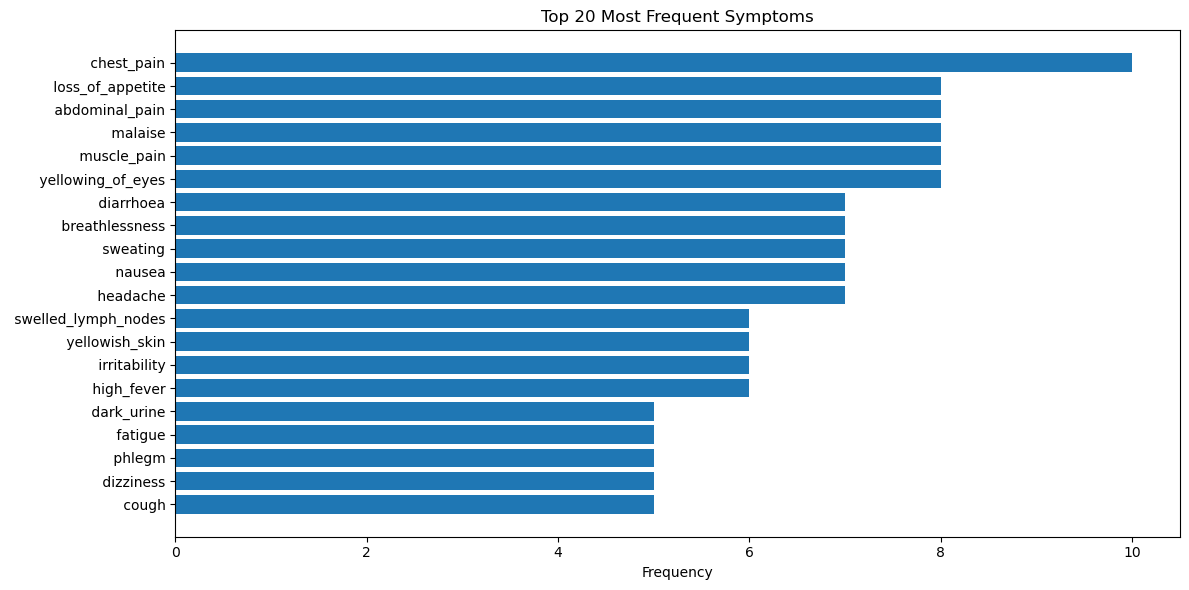

In [31]:
import matplotlib.pyplot as plt

top_20 = symptom_summary.head(20)
plt.figure(figsize=(12,6))
plt.barh(top_20['Symptom'], top_20['Frequency'])
plt.gca().invert_yaxis()
plt.title("Top 20 Most Frequent Symptoms")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

## 10. This heatmap shows how frequently symptoms appear together in the same patient record. Each cell represents the number of times two symptoms co-occur across all diseases. This helps identify symptom clusters — for example, if "nausea" and "vomiting" frequently appear together, it may suggest diagnostic groupings or co-dependent conditions.

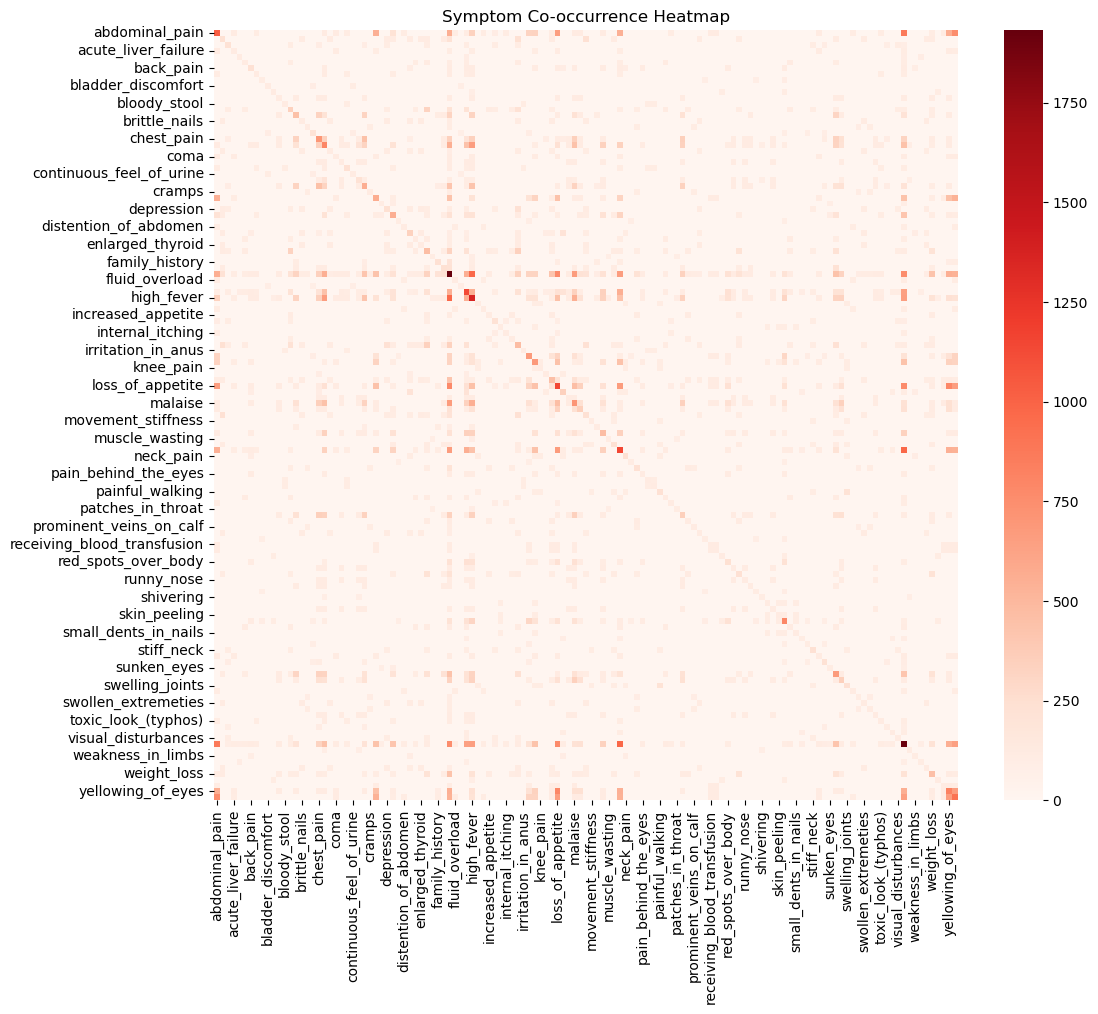

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

df['symptom_list'] = df[symptom_cols].apply(lambda row: [str(x).strip() for x in row if pd.notnull(x)], axis=1)

mlb = MultiLabelBinarizer()
symptom_matrix = mlb.fit_transform(df['symptom_list'])

co_matrix = symptom_matrix.T @ symptom_matrix
co_df = pd.DataFrame(co_matrix, index=mlb.classes_, columns=mlb.classes_)

plt.figure(figsize=(12,10))
sns.heatmap(co_df, cmap="Reds")
plt.title("Symptom Co-occurrence Heatmap")
plt.show()

## Summary & Insights

- Fatigue, vomiting, and weight loss are among the most frequently occurring symptoms across all diseases.
- Diseases such as Diabetes, Migraine, and GERD show strong associations with specific symptom clusters.
- The symptom co-occurrence heatmap highlights which symptoms tend to appear together — valuable for diagnosis or machine learning feature design.
- This analysis could serve as a foundation for predictive modeling or interactive dashboard design in a real-world health data pipeline.